## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
# Combine the data into a single dataset
dataset = pd.merge(mouse_metadata, study_results, how ='inner', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Check the number of mice.
miceNo = len(dataset["Mouse ID"].unique())
print(miceNo)

249


In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = dataset[dataset.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata = dataset.drop_duplicates(subset=['Mouse ID', 'Timepoint']).reset_index(drop=True)
cleandata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Check the number of mice in the clean DataFrame.
miceNo = len(dataset["Mouse ID"].unique())
print(miceNo)

249


## Summary Statistics

In [8]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, 
    #and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drugs = cleandata['Drug Regimen'].unique()
print(drugs)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [9]:
# Create Drug Regimen DataFrames 
Ram = cleandata.loc[(cleandata["Drug Regimen"] == "Ramicane"), :]
RamDF = pd.DataFrame(Ram)
# RamDF
                      
Cap = cleandata.loc[(cleandata["Drug Regimen"] == "Capomulin"), :]
CapDF = pd.DataFrame(Cap)
# CapDF

Inf = cleandata.loc[(cleandata["Drug Regimen"] == "Infubinol"), :]
InfDF = pd.DataFrame(Inf)
# InfDF
        
PL = cleandata.loc[(cleandata["Drug Regimen"] == "Placebo"), :]
PLDF = pd.DataFrame(PL)
# PLDF

Ceft = cleandata.loc[(cleandata["Drug Regimen"] == "Ceftamin"), :]
CeftDF = pd.DataFrame(Ceft)
# CeftDF

Stel = cleandata.loc[(cleandata["Drug Regimen"] == "Stelasyn"), :]
StelDF = pd.DataFrame(Stel)
# StelDF

Zoni = cleandata.loc[(cleandata["Drug Regimen"] == "Zoniferol"), :]
ZoniDF = pd.DataFrame(Zoni)
# ZoniDF

Keta = cleandata.loc[(cleandata["Drug Regimen"] == "Ketapril"), :]
KetaDF = pd.DataFrame(Keta)
# KetaDF

Prop = cleandata.loc[(cleandata["Drug Regimen"] == "Propriva"), :]
PropDF = pd.DataFrame(Prop)
# PropDF

Naft = cleandata.loc[(cleandata["Drug Regimen"] == "Naftisol"), :]
NaftDF = pd.DataFrame(Naft)
# NaftDF

In [10]:
#Run Stats on New Dataframes
RamMean = round(RamDF['Tumor Volume (mm3)'].mean(),4)
RamMedian = round(RamDF['Tumor Volume (mm3)'].median(),4)
RamStd = round(RamDF['Tumor Volume (mm3)'].std(),4)
RamSem = round(RamDF['Tumor Volume (mm3)'].sem(),4)
               
# print(RamMean)
# print(RamMedian)
# print(RamStd)
# print(RamSem)

CapMean = round(CapDF['Tumor Volume (mm3)'].mean(),4)
CapMedian = round(CapDF['Tumor Volume (mm3)'].median(),4)
CapStd = round(CapDF['Tumor Volume (mm3)'].std(),4)
CapSem = round(CapDF['Tumor Volume (mm3)'].sem(),4)

InfMean = round(InfDF['Tumor Volume (mm3)'].mean(),4)
InfMedian = round(InfDF['Tumor Volume (mm3)'].median(),4)
InfStd = round(InfDF['Tumor Volume (mm3)'].std(),4)
InfSem = round(InfDF['Tumor Volume (mm3)'].sem(),4)

PLMean = round(PLDF['Tumor Volume (mm3)'].mean(),4)
PLMedian = round(PLDF['Tumor Volume (mm3)'].median(),4)
PLStd = round(PLDF['Tumor Volume (mm3)'].std(),4)
PLSem = round(PLDF['Tumor Volume (mm3)'].sem(),4)

CeftMean = round(CeftDF['Tumor Volume (mm3)'].mean(),4)
CeftMedian = round(CeftDF['Tumor Volume (mm3)'].median(),4)
CeftStd = round(CeftDF['Tumor Volume (mm3)'].std(),4)
CeftSem = round(CeftDF['Tumor Volume (mm3)'].sem(),4)

StelMean = round(StelDF['Tumor Volume (mm3)'].mean(),4)
StelMedian = round(StelDF['Tumor Volume (mm3)'].median(),4)
StelStd = round(StelDF['Tumor Volume (mm3)'].std(),4)
StelSem = round(StelDF['Tumor Volume (mm3)'].sem(),4)

ZoniMean = round(ZoniDF['Tumor Volume (mm3)'].mean(),4)
ZoniMedian = round(ZoniDF['Tumor Volume (mm3)'].median(),4)
ZoniStd = round(ZoniDF['Tumor Volume (mm3)'].std(),4)
ZoniSem = round(ZoniDF['Tumor Volume (mm3)'].sem(),4)

KetaMean = round(KetaDF['Tumor Volume (mm3)'].mean(),4)
KetaMedian = round(KetaDF['Tumor Volume (mm3)'].median(),4)
KetaStd = round(KetaDF['Tumor Volume (mm3)'].std(),4)
KetaSem = round(KetaDF['Tumor Volume (mm3)'].sem(),4)

PropMean = round(PropDF['Tumor Volume (mm3)'].mean(),4)
PropMedian = round(PropDF['Tumor Volume (mm3)'].median(),4)
PropStd = round(PropDF['Tumor Volume (mm3)'].std(),4)
PropSem = round(PropDF['Tumor Volume (mm3)'].sem(),4)

NaftMean = round(NaftDF['Tumor Volume (mm3)'].mean(),4)
NaftMedian = round(NaftDF['Tumor Volume (mm3)'].median(),4)
NaftStd = round(NaftDF['Tumor Volume (mm3)'].std(),4)
NaftSem = round(NaftDF['Tumor Volume (mm3)'].sem(),4)

In [11]:
data = {'Ramicane': [RamMean, RamMedian, RamStd, RamSem],
        'Capomulin': [CapMean, CapMedian, CapStd, CapSem],
        'Infubinol': [InfMean, InfMedian, InfStd, InfSem],
        'Placebo': [PLMean, PLMedian, PLStd, PLSem],
        'Ceftamin': [CeftMean, CeftMedian, CeftStd, CeftSem],
        'Stelasyn': [StelMean, StelMedian, StelStd, StelSem],
        'Zoniferol': [ZoniMean, ZoniMedian, ZoniStd, ZoniSem],
        'Ketapril': [KetaMean, KetaMedian, KetaStd, KetaSem],
        'Propriva': [PropMean, PropMedian, PropStd, PropSem],
        'Naftisol': [NaftMean, NaftMedian, PropStd, NaftSem]}
            
SummaryDF = pd.DataFrame(data, index = {'Mean Tumor Volume (mm3)', 'Median Tumor Volume (mm3)', 'Standard Deviation', 'SEM'})
SummaryDF 


,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
Median Tumor Volume (mm3),40.2167,40.6757,52.8848,54.0336,52.5912,54.2331,53.2365,55.2356,52.3935,54.3316
Mean Tumor Volume (mm3),40.6732,41.5578,51.8206,52.2889,51.7762,52.4317,51.8185,53.6987,50.9100,52.5093
SEM,4.8463,4.9948,6.5672,7.8210,6.2682,7.7104,6.9666,8.2797,6.5680,6.5680
Standard Deviation,0.3210,0.3293,0.4922,0.5813,0.4698,0.5731,0.5164,0.6039,0.5259,0.5965


In [12]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)


## Bar and Pie Charts

Text(0.5, 0, 'Regimen')

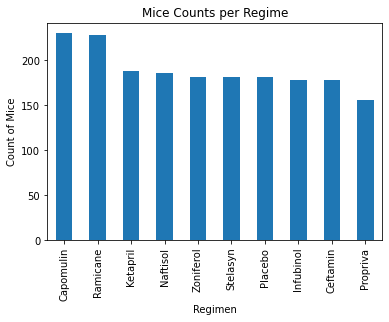

In [13]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 

## Note: this plot will be identical to the one that uses Pyplot
RegMCount = cleandata['Drug Regimen'].value_counts()
RegMCount.plot(kind='bar')

# Set textual properties
plt.title('Mice Counts per Regime')
plt.ylabel('Count of Mice')
plt.xlabel('Regimen')

In [16]:
#create dataframe
MCountDF = pd.DataFrame(RegMCount)
MCountDF
#style
SMCountDF = MCountDF.reset_index(drop=False)
SMCountDF = SMCountDF.rename(columns={'Drug Regimen': 'Mice Count', 'index': 'Drug Regimen'})
SMCountDF


,Drug Regimen,Mice Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,156


Text(0.5, 0, 'Regimen')

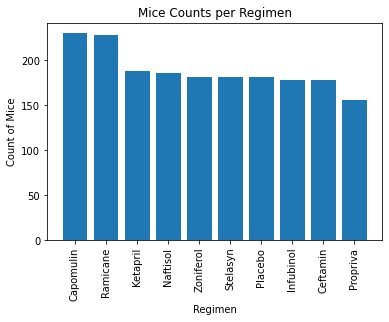

In [17]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.

# Set x axis and tick locations
x_axis = np.arange(len(SMCountDF))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, SMCountDF['Mice Count'], alpha=1.0, align="center")
plt.xticks(tick_locations, SMCountDF['Drug Regimen'], rotation="vertical")

# Set textual properties
plt.title("Mice Counts per Regimen")
plt.ylabel("Count of Mice")
plt.xlabel("Regimen")

##  Note: this plot will be identical to the one that uses Pandas


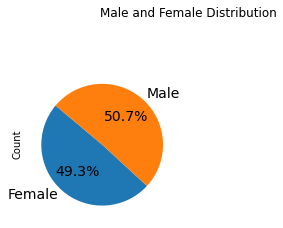

In [22]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice

SexM_df = cleandata[["Sex", "Mouse ID"]]
SexM_df.head()

groupbyS = SexM_df.groupby(["Sex"])
groupedSexdf = groupbyS["Mouse ID"].count()

sexCount_df = pd.DataFrame({"Count": groupedSexdf})
#sexCount_df


ax1 = plt.subplot(121, aspect='equal')
sex_pie = sexCount_df.plot(kind="pie", subplots=True, ax=ax1, autopct='%1.1f%%', 
 startangle=140, shadow=False, legend = False, fontsize=14, title=("Male and Female Distribution"))

plt.show()

## Note: this plot will be identical to the one that uses Pyplot

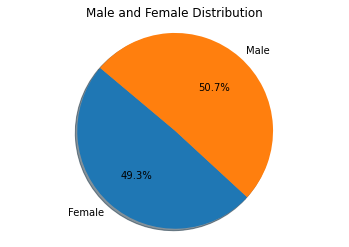

In [28]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
newindex_df = sexCount_df.reset_index(drop=False)

plt.pie(newindex_df["Count"], labels=newindex_df["Sex"], autopct="%1.1f%%", shadow=True, startangle=140)


# Formatting
plt.title('Male and Female Distribution')
plt.axis('equal')
plt.show()

##  Note: this plot will be identical to the one that uses Pandas

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

CapGroup = CapDF.groupby(["Mouse ID"])
CapGroupMax = CapGroup["Timepoint"].max()
CapGroupMaxDF = pd.DataFrame(CapGroupMax)
CapGroupMaxDF

MergeCap = pd.merge(CapGroupMaxDF, cleandata,  how='inner', left_on=["Mouse ID", "Timepoint"], 
                   right_on = ["Mouse ID", "Timepoint"])
MergeCap2 = MergeCap[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
MergeCap2

#--------

RamGroup = RamDF.groupby(["Mouse ID"])
RamGroupMax = RamGroup["Timepoint"].max()
RamGroupMaxDF = pd.DataFrame(RamGroupMax)
RamGroupMaxDF

MergeRam = pd.merge(RamGroupMaxDF, cleandata,  how='inner', left_on=["Mouse ID", "Timepoint"], 
                   right_on = ["Mouse ID", "Timepoint"])
MergeRam2 = MergeRam[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
MergeRam2

#--------

InfGroup = InfDF.groupby(["Mouse ID"])
InfGroupMax = InfGroup["Timepoint"].max()
InfGroupMaxDF = pd.DataFrame(InfGroupMax)
InfGroupMaxDF

MergeInf = pd.merge(InfGroupMaxDF, cleandata,  how='inner', left_on=["Mouse ID", "Timepoint"], 
                   right_on = ["Mouse ID", "Timepoint"])
MergeInf2 = MergeInf[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
MergeInf2

#--------

CeftGroup = CeftDF.groupby(["Mouse ID"])
CeftGroupMax = CeftGroup["Timepoint"].max()
CeftGroupMaxDF = pd.DataFrame(CeftGroupMax)
CeftGroupMaxDF

MergeCeft = pd.merge(CeftGroupMaxDF, cleandata,  how='inner', left_on=["Mouse ID", "Timepoint"], 
                   right_on = ["Mouse ID", "Timepoint"])
MergeCeft2 = MergeCeft[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
MergeCeft2


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,b128,Capomulin,45,38.982878
1,b742,Capomulin,45,38.939633
2,f966,Capomulin,20,30.485985
3,g288,Capomulin,45,37.074024
4,g316,Capomulin,45,40.159220
...,...,...,...,...
95,x226,Ceftamin,0,45.000000
96,x581,Ceftamin,45,64.634949
97,x822,Ceftamin,45,61.386660
98,y769,Ceftamin,45,68.594745


In [70]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)

append1 = MergeCap2.append(MergeRam2, ignore_index = True) 
append2 = append1.append(MergeInf2, ignore_index = True)
append3 = append2.append(MergeCeft2, ignore_index = True)
append3


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,b128,Capomulin,45,38.982878
1,b742,Capomulin,45,38.939633
2,f966,Capomulin,20,30.485985
3,g288,Capomulin,45,37.074024
4,g316,Capomulin,45,40.159220
...,...,...,...,...
95,x226,Ceftamin,0,45.000000
96,x581,Ceftamin,45,64.634949
97,x822,Ceftamin,45,61.386660
98,y769,Ceftamin,45,68.594745


In [71]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds

CapQuart = MergeCap2["Tumor Volume (mm3)"].quantile([.25, .5, .75])
CapQuart
LowQCap = CapQuart.iloc[0]
UpQCap = CapQuart.iloc[2]
# print(LowQCap)
# print(UpQCap)
iqrCap = UpQCap - LowQCap
LowBCap = LowQCap - (1.5*iqrCap)
UpBCap = UpQCap + (1.5*iqrCap)
print(f"A value below {LowBCap} indicates an outlier for Capomulin.")
print(f"A value above {UpBCap} indicates an outlier for Capomulin.")
MergeCap2

# There are no outliers for Capomulin


A value below 20.70456164999999 indicate an outlier for Capomulin.
A value above 51.83201549 indicate an outlier for Capomulin.


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,b128,Capomulin,45,38.982878
1,b742,Capomulin,45,38.939633
2,f966,Capomulin,20,30.485985
3,g288,Capomulin,45,37.074024
4,g316,Capomulin,45,40.159220
5,i557,Capomulin,45,47.685963
6,i738,Capomulin,45,37.311846
7,j119,Capomulin,45,38.125164
8,j246,Capomulin,35,38.753265
9,l509,Capomulin,45,41.483008


In [75]:
#Continued
RamQuart = MergeRam2["Tumor Volume (mm3)"].quantile([.25, .5, .75])
RamQuart
LowQRam = RamQuart.iloc[0]
UpQRam = RamQuart.iloc[2]
iqrRam = UpQRam - LowQRam
LowBRam = LowQRam - (1.5*iqrRam)
UpBRam = UpQRam + (1.5*iqrRam)
print(f"A value below {LowBRam} indicates an outlier for Ramicane.")
print(f"A value above {UpBRam} indicates an outlier for Ramicane.")

MergeRam2

#There are no outliers for Ramicane

A value below 17.912664470000003 indicate an outlier for Ramicane.
A value above 54.30681135 indicate an outlier for Ramicane.


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a411,Ramicane,45,38.407618
1,a444,Ramicane,45,43.047543
2,a520,Ramicane,45,38.810366
3,a644,Ramicane,45,32.978522
4,c458,Ramicane,30,38.342008
5,c758,Ramicane,45,33.397653
6,d251,Ramicane,45,37.311236
7,e662,Ramicane,45,40.659006
8,g791,Ramicane,45,29.128472
9,i177,Ramicane,45,33.562402


In [77]:
#Continued
InfQuart = MergeInf2["Tumor Volume (mm3)"].quantile([.25, .5, .75])
InfQuart
LowQInf = InfQuart.iloc[0]
UpQInf = InfQuart.iloc[2]
iqrInf = UpQInf - LowQInf
LowBInf = LowQInf - (1.5*iqrInf)
UpBInf = UpQInf + (1.5*iqrInf)
print(f"A value below {LowBInf} indicates an outlier for Infubinol.")
print(f"A value above {UpBInf} indicates an outlier for Infubinol.")

MergeInf2

#There IS ONE outliers for Infubinol
    #Mouse c326 has a tumor volume of 36.32

A value below 36.83290494999999 indicates an outlier for Infubinol.
A value above 82.74144559000001 indicates an outlier for Infubinol.


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a577,Infubinol,30,57.031862
3,a685,Infubinol,45,66.083066
4,c139,Infubinol,45,72.226731
5,c326,Infubinol,5,36.321346
6,c895,Infubinol,30,60.969711
7,e476,Infubinol,45,62.435404
8,f345,Infubinol,45,60.918767
9,i386,Infubinol,40,67.289621


In [80]:
#Continued
CeftQuart = MergeCeft2["Tumor Volume (mm3)"].quantile([.25, .5, .75])
CeftQuart
LowQCeft = CeftQuart.iloc[0]
UpQCeft = CeftQuart.iloc[2]
iqrCeft = UpQCeft - LowQCeft
LowBCeft = LowQCeft - (1.5*iqrCeft)
UpBCeft = UpQCeft + (1.5*iqrCeft)
print(f"A value below {LowBCeft} indicates an outlier for Ceftamin.")
print(f"A value above {UpBCeft} indicates an outlier for Ceftamin.")

MergeCeft2

#There are no outliers for Ceftamin

A value below 25.355449580000002 indicates an outlier for Ceftamin.
A value above 87.66645829999999 indicates an outlier for Ceftamin.


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a275,Ceftamin,45,62.999356
1,b447,Ceftamin,0,45.000000
2,b487,Ceftamin,25,56.057749
3,b759,Ceftamin,30,55.742829
4,f436,Ceftamin,15,48.722078
5,h531,Ceftamin,5,47.784682
6,j296,Ceftamin,45,61.849023
7,k210,Ceftamin,45,68.923185
8,l471,Ceftamin,45,67.748662
9,l490,Ceftamin,30,57.918381


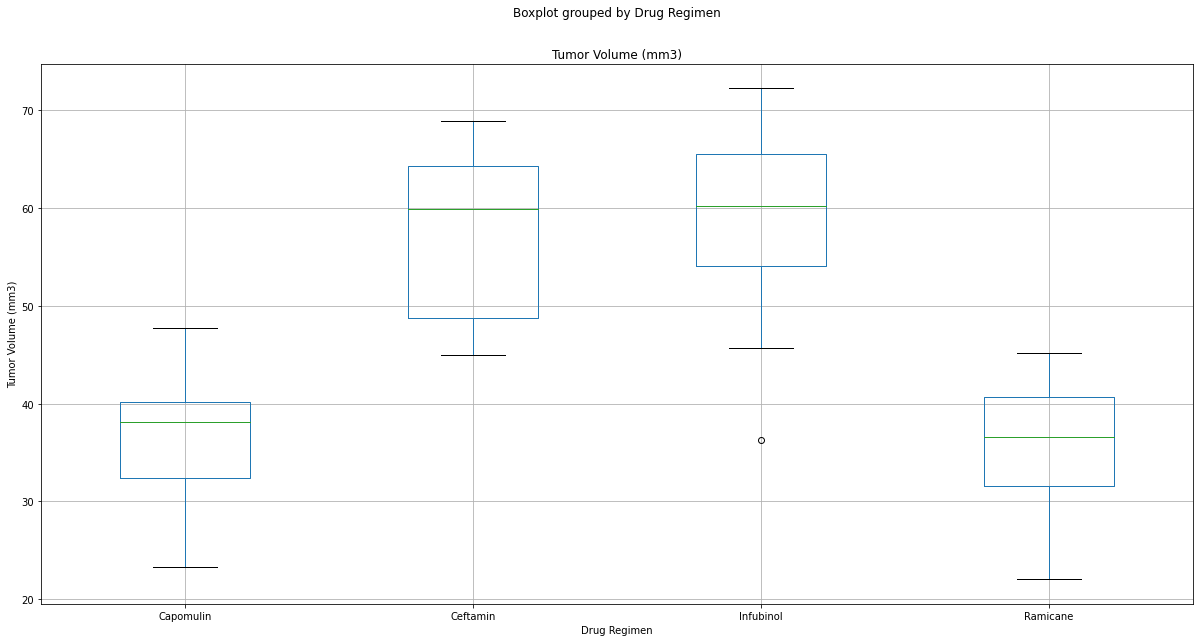

In [81]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
append3.boxplot("Tumor Volume (mm3)", by="Drug Regimen", figsize=(20, 10))
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

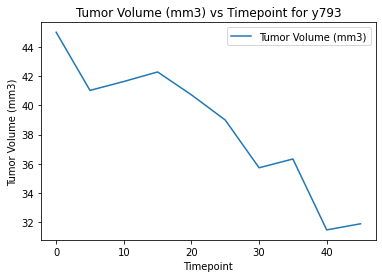

In [90]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
MouseDf = cleandata.loc[(cleandata["Mouse ID"] == "y793"), :]
MouseDf

MouseDf.plot.line(x = "Timepoint", y = "Tumor Volume (mm3)")

plt.title("Tumor Volume (mm3) vs Timepoint for y793")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

plt.show

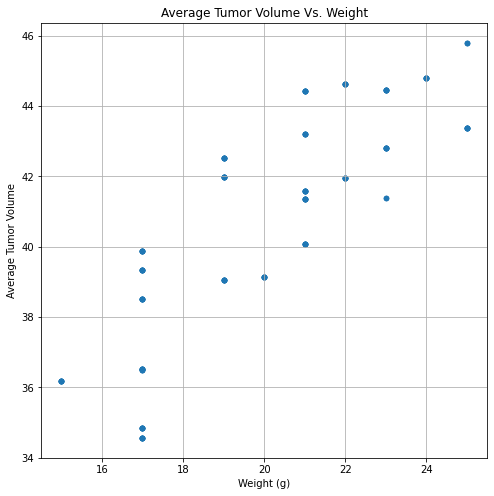

In [103]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
CapGB = CapDF.groupby(["Mouse ID"])
tumorAvgW = CapGB["Tumor Volume (mm3)"].mean()

tumorDf = pd.DataFrame({"Average Tumor Volume": tumorAvgW})
plotDf = pd.merge(CapDF, tumorDf, how="inner", on=["Mouse ID", "Mouse ID"])
plotDf2 = plotDf[["Mouse ID", "Weight (g)", "Average Tumor Volume"]]

plotDf2.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(8,8),
              title="Average Tumor Volume Vs. Weight")
plt.show()



## Correlation and Regression

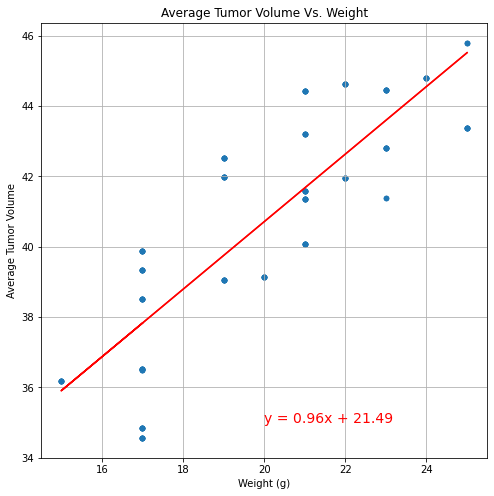

The correlation between both factors is 0.83


In [104]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.

x_values = plotDf2['Weight (g)']
y_values = plotDf2['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plotDf2.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(8,8),
              title="Average Tumor Volume Vs. Weight")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=14,color="red")
plt.plot(x_values,regress_values,"r-")
plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")


1. There is one outlier due to low tumor size in the Box and Whisker plot for Infubinol. A value below 36.8329 indicates an outlier for Infubinol of which Mouse c326 has a tumor volume of 36.32. 
2. The box plot show that Capomulin and Ramicane have the smallest Tumor Volumes of those analyzed. They may be more effective than their counterparts. 
3. There is a strong correlation between the Average Tumor Volume and Weight of the mice. 